In [86]:
import pandas as pd
import numpy as np

In [87]:
df=pd.read_csv("Data For Prediction.csv")


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [89]:
train=df.drop(
    [
   #'year',
  #'certificate',
    'movie', 

    'genre', 
#    'rate',
#     'metascore', 
#      'votes',
#      'gross', 
#      'user_reviews',
#      'critic_reviews',
#      'popularity', 
#      'awards_wins',
#      'awards_nominations',
 'Oscar_Best_Picture_won',
#'Oscar_Best_Picture_nominated', 
    'Oscar_Best_Director_won',
      
   #'Oscar_Best_Director_nominated',
    'Oscar_Best_Actor_won',
    #'Oscar_Best_Actor_nominated', 
    'Oscar_Best_Actress_won',
   #'Oscar_Best_Actress_nominated',
  #  'other_bestPicture_won',
#      'other_director_won', 
    #'other_actor_won', 
#    'other_actress_won',
   #  'other_bestPicture_nominated', 
#      'other_director_nominated',
#        'other_actor_nominated',
 #    'other_actress_nominated'
    ],
     
     
     
     
     
    axis=1)

In [90]:
test=pd.DataFrame()

In [91]:
test['Oscar_Best_Actor_won']=df['Oscar_Best_Actor_won']
test.iloc[1160]

Oscar_Best_Actor_won    1
Name: 1160, dtype: int64

In [92]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
for i in train.index:
    if(int(train['year'][i])<2017):

        X_train.append(train.iloc[i])
        Y_train.append(test['Oscar_Best_Actor_won'][i])
    else:
        X_test.append(train.iloc[i])
        Y_test.append(test['Oscar_Best_Actor_won'][i])
        

In [93]:
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)

In [94]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
Y_train=(Y_train-Y_train.min())/(Y_train.max()-Y_train.min())
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())
Y_test=(Y_test-Y_test.min())/(Y_test.max()-Y_test.min())

In [95]:
X_train=X_train.drop(['year'],axis=1)
X_test=X_test.drop(['year'],axis=1)

In [33]:
regr=LinearRegression()
regr.fit(X_train,Y_train)
pred=regr.predict(X_test)
print(regr.score(X_test,Y_test))
df_norm=pd.DataFrame(pred)
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())


-0.005757155420906157


In [34]:
df_norm.sort_values(by=[0],ascending=False).head(5)

,0
25,1.000000
14,0.813523
18,0.361090
26,0.136340
29,0.122883


In [37]:
Y_test.iloc[18]

0    0.0
Name: 18, dtype: float64

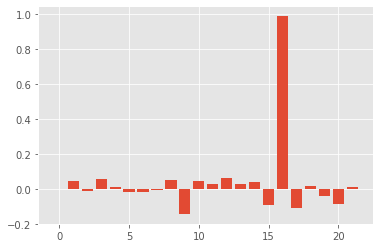

In [96]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.coef_
# summarize feature importance
a=importance[0]
a=sorted(a,reverse=True)

b=importance[0]
c=[col for col in X_train.columns]
dic=dict()
for i,v in enumerate(b):
    if(v>=0):
        dic[c[i]]=v
a={k:v for k,v in sorted(dic.items(),reverse=True,key= lambda item:item[1])}


pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [97]:
a

{'other_actor_won': 0.9855017323429783,
 'Oscar_Best_Actor_nominated': 0.06324872938362161,
 'votes': 0.05318044008762556,
 'awards_wins': 0.04983133005458443,
 'Oscar_Best_Picture_nominated': 0.04197287360393406,
 'rate': 0.04177916685167099,
 'other_bestPicture_won': 0.03582823436534986,
 'Oscar_Best_Actress_nominated': 0.02719888932365217,
 'Oscar_Best_Director_nominated': 0.02449426575414817,
 'other_bestPicture_nominated': 0.01709745161341842,
 'other_actress_nominated': 0.011412544090177142,
 'gross': 0.007869700528530093}

In [98]:
import matplotlib
import matplotlib.pyplot as plt

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1148    0.0
1149    0.0
1150    0.0
1151    0.0
1152    0.0
Name: 0, Length: 1153, dtype: float64

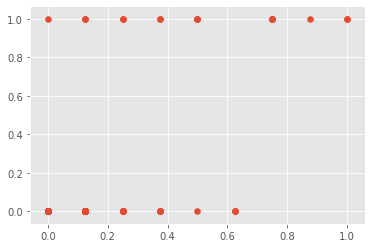

In [77]:
matplotlib.style.use('ggplot')
x=X_train['other_actor_won']
y=Y_train[0]
plt.scatter(x,y)
plt.show()

In [81]:
corrDf=pd.DataFrame(
)

In [99]:
corrDf['other_actor_won']=X_train['other_actor_won']
corrDf['Oscar_Best_Actor_nominated']=X_train['Oscar_Best_Actor_nominated']
corrDf['votes']=X_train['votes']
corrDf['Oscar_Best_Picture_nominated']=X_train['Oscar_Best_Picture_nominated']
corrDf['awards_wins']=X_train['awards_wins']
corrDf['rate']=X_train['rate']
corrDf['other_bestPicture_won']=X_train['other_bestPicture_won']
corrDf['Oscar_Best_Actress_nominated']=X_train['Oscar_Best_Actress_nominated']
corrDf['Oscar_Best_Director_nominated']=X_train['Oscar_Best_Director_nominated']
corrDf['other_bestPicture_nominated']=X_train['other_bestPicture_nominated']
corrDf['other_actress_nominated']=X_train['other_actress_nominated']
corrDf['gross']=X_train['gross']
corrDf['Oscar_Best_Actor_won']=Y_train[0]


In [100]:
corr=corrDf.corr()

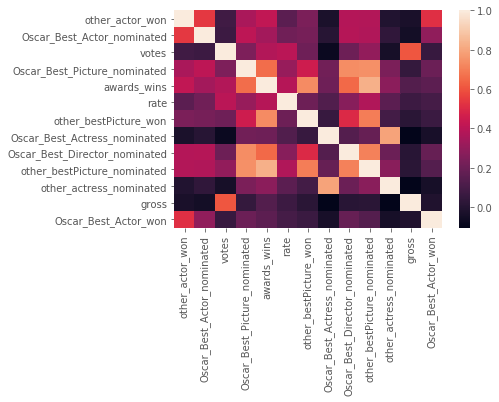

In [102]:
sns.heatmap(corr);